<a href="https://colab.research.google.com/github/Ashwin9084/SRIP_IITGN_Ashwin_Nair/blob/main/SRIP_IITGN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [142]:
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt
from jax.scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib.patches import Ellipse
import ipywidgets as widgets
!pip install blackjax
import blackjax 
from jax import random

# Task 1

Using JAX package to graph a bivariate distribution 

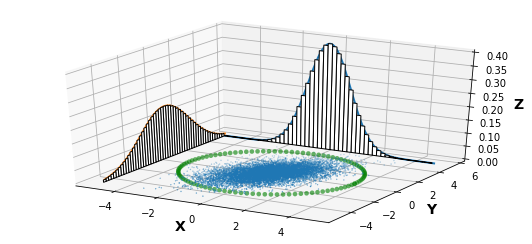

In [314]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
def Bi_variate_pdf(Mean_x,Mean_y,C_var_x,C_var_y,r):
  #Delacring the limits of ploting
  x=np.linspace(-(Mean_x+5),Mean_x+5,500)
  y=np.linspace(-(Mean_y+5),Mean_y+5,500)
  #Bi-variate mean and covariance
  #MeanVec=np.array([0,0])
  MeanVec=np.array([Mean_x,Mean_y])
  CovMatrix=np.array([[C_var_x,r],[r,C_var_y]])
  #CovMatrix=np.array([[1,0.6],[0.6,2]])
  #Get 1-d pdfs for the walls
  Z_x = norm.pdf(x , loc = MeanVec[0] , scale = CovMatrix[0,0])
  Z_y = norm.pdf(y , loc = MeanVec[1] , scale = CovMatrix[1,1] )
  #Get 2-d samples on the floor
  key = jax.random.PRNGKey(0)
  Samples = jax.random.multivariate_normal(key,MeanVec, CovMatrix, (10000,));
  #Getting the ellipse
  L=jnp.linalg.cholesky(CovMatrix)
  t = jnp.linspace(0,2*jnp.pi,100)
  C = jnp.array([[jnp.cos(t)],[jnp.sin(t)]])
  # E1 = 1*jnp.matmul(L,C)
  # E2 = 2*jnp.matmul(L,C)
  E3 = 3*L[1,1]*C
  #plotting the floor plot
  fig = plt.figure()
  ax=fig.gca(projection='3d')
  ax.scatter3D(Samples[:,0],Samples[:,1],jnp.zeros(10000),s=.1) #change when general
  ax.scatter3D(E3[0,:], E3[1,:], 1e-3+jnp.zeros((1)),alpha=0.6,color='green',linewidth=.1) #change when general
  ax.set_xlabel('X',fontweight='bold', fontsize=14.0)
  ax.set_ylabel('Y',fontweight='bold', fontsize=14.0)
  ax.set_zlabel('Z',fontweight='bold', fontsize=14.0)
  ax.set_zlim3d(0, .4)    
  #ploting the wall plots
  ax.plot3D(x, jnp.ones(len(x))*y[-1], Z_x,'-',linewidth=2) 
  ax.plot3D(jnp.ones(len(y))*x[0], y, Z_y,'-',linewidth=2) 
  #Making histograms
  #making histogram of pdf(x)
  x_histo=[x[i] for i in range(len(x)) if i % 10 == 0]
  Z_x_histo=[Z_x[i] for i in range(len(Z_x)) if i % 10 == 0]
  ax.bar(x_histo, Z_x_histo, zs=y[-1], zdir='y', edgecolor='black',color='white',width=.2)
  #making histogram of pdf(y)
  y_histo=[y[i] for i in range(len(y)) if i % 10 == 0]
  Z_y_histo=[Z_y[i] for i in range(len(Z_y)) if i % 10 == 0]
  ax.bar(y_histo, Z_y_histo, zs=x[0], zdir='x', edgecolor='black',color='white',width=.2)
  plt.show()
  # ax.set_ylim3d(-2, 2)                    
  # ax.set_xlim3d(-2, 2)      
Bi_variate_pdf(0,0,1,2,0.6)         

Implementing the ipyhton widgets to get to add interactivity in bivariate distribution, to animate a bivariate distribution.

In [315]:
def Bi_variate_pdf(Mean_x,Mean_y,C_var_x,C_var_y,r):
  #Delacring the limits of ploting
  x=np.linspace(-(Mean_x+5),Mean_x+5,500)
  y=np.linspace(-(Mean_y+5),Mean_y+5,500)
  #Bi-variate mean and covariance
  #MeanVec=np.array([0,0])
  MeanVec=np.array([Mean_x,Mean_y])
  CovMatrix=np.array([[C_var_x,r],[r,C_var_y]])
  #CovMatrix=np.array([[1,0.6],[0.6,2]])
  #Get 1-d pdfs for the walls
  Z_x = norm.pdf(x , loc = MeanVec[0] , scale = CovMatrix[0,0])
  Z_y = norm.pdf(y , loc = MeanVec[1] , scale = CovMatrix[1,1] )
  #Get 2-d samples on the floor
  key = jax.random.PRNGKey(0)
  Samples = jax.random.multivariate_normal(key,MeanVec, CovMatrix, (10000,));
  '''
  Getting the ellipse
  L=jnp.linalg.cholesky(CovMatrix)
  t = jnp.linspace(0,2*jnp.pi,100)
  C = jnp.array([[jnp.cos(t)],[jnp.sin(t)]])
  E3 = 3*L[1,1]*C
  '''
  #plotting the floor plot
  fig = plt.figure()
  ax=fig.gca(projection='3d')
  ax.scatter3D(Samples[:,0],Samples[:,1],jnp.zeros(10000),s=.1) #change when general
  #ax.scatter3D(E3[0,:], E3[1,:], jnp.zeros((1)),alpha=0.2,color='green',linewidth=.1) #change when general
  ax.set_xlabel('X',fontweight='bold', fontsize=14.0)
  ax.set_ylabel('Y',fontweight='bold', fontsize=14.0)
  ax.set_zlabel('Z',fontweight='bold', fontsize=14.0)
  ax.set_zlim3d(0, .4)    
  #ploting the wall plots
  ax.plot3D(x, jnp.ones(len(x))*y[-1], Z_x,'-',linewidth=2) 
  ax.plot3D(jnp.ones(len(y))*x[0], y, Z_y,'-',linewidth=2) 
  #Making histograms
  #making histogram of pdf(x)
  x_histo=[x[i] for i in range(len(x)) if i % 15 == 0]
  Z_x_histo=[Z_x[i] for i in range(len(Z_x)) if i % 15 == 0]
  ax.bar(x_histo, Z_x_histo, zs=y[-1], zdir='y', edgecolor='black',color='white',width=.2)
  #making histogram of pdf(y)
  y_histo=[y[i] for i in range(len(y)) if i % 20 == 0]
  Z_y_histo=[Z_y[i] for i in range(len(Z_y)) if i % 20 == 0]
  ax.bar(y_histo, Z_y_histo, zs=x[0], zdir='x', edgecolor='black',color='white',width=.2)

  # ax.set_ylim3d(-2, 2)                    
  # ax.set_xlim3d(-2, 2)   
widgets.interact( Bi_variate_pdf,Mean_x=(0,4),Mean_y=(0,4),C_var_x=(1,4),C_var_y=(1,4),r=(.6,2) )

interactive(children=(IntSlider(value=2, description='Mean_x', max=4), IntSlider(value=2, description='Mean_y'…

<function __main__.Bi_variate_pdf>

## Refrences For Task 1
1. [https://en.wikipedia.org/wiki/Multivariate_normal_distribution](https://en.wikipedia.org/wiki/Multivariate_normal_distribution)
2. [https://github.com/kimfetti/Videos/blob/master/Matplotlib_Tips/12_3Dplots.ipynb](https://github.com/kimfetti/Videos/blob/master/Matplotlib_Tips/12_3Dplots.ipynb)
3. [https://jax.readthedocs.io/en/latest/_autosummary/jax.numpy.ndarray.at.html#jax.numpy.ndarray.at](https://jax.readthedocs.io/en/latest/_autosummary/jax.numpy.ndarray.at.html#jax.numpy.ndarray.at)
4. [https://www.youtube.com/watch?v=wb6k_T4rKBQ](https://www.youtube.com/watch?v=wb6k_T4rKBQ)

# Task 2

Using sampling with Jax package.

The result can be found upto 6th dimension after which the results took a long time in my laptop

In [31]:
keys = jax.random.PRNGKey(1701)

In [70]:

n=int(input('Enter the Dimensions of MVN : '))
#Box-Muller transform to covert a uniform distribtion to normal distribution
key, subkey = jax.random.split(keys)
u= jax.random.uniform(subkey,shape=(1000,n))
u_1=u[:500]
u_2=u[500:]
x_1=jnp.sqrt(-2*jnp.log(u_1))*jnp.cos(2*jnp.pi*u_2)
x_2=jnp.sqrt(-2*jnp.log(u_1))*jnp.sin(2*jnp.pi*u_2)
x=jnp.concatenate((x_1,x_2),axis=0)

#Taking a random mean array
mu=jax.random.uniform(key, shape=(1,n),minval=0,maxval=n)
print('\n\nThe input mean is : ', mu)
k=1
keys=key
#Taking a random covariance matrix
while k==1:
  key, subkey = jax.random.split(keys)
  cov=jax.random.uniform(key, shape=(n,n),minval=0,maxval=n)
  diagonal=jax.random.uniform(key, shape=(1,1),minval=0,maxval=n)
  for i in range(n):
    for j in range(n):
      if (i+j==n-1):
          cov=cov.at[i:i+1,j:j+1].set(diagonal)
  keys = key
  L=jnp.linalg.cholesky(cov)
  if (jnp.all(jnp.isnan(L)==False)):
    break
print('The input covariance matrix is : \n',cov,'\n\n')
y=mu+x@L.T
keys =key
print('The mean from the samples is : ',jnp.mean(y, axis= 0))
print('The covariacne matrix from the samples is : \n',jnp.cov(y.T))

Enter the Dimensions of MVN : 6


The input mean is :  [[3.45184   4.655738  1.3392656 3.4143913 1.5952299 5.4793496]]
The input covariance matrix is : 
 [[5.7266006  1.2194188  3.9259722  1.2482564  0.05846357 3.008503  ]
 [2.8071127  4.4642186  4.756916   3.1097596  3.008503   0.6493113 ]
 [2.6487243  0.71445894 5.679147   3.008503   0.8019383  3.361403  ]
 [3.6088085  5.535058   3.008503   5.70214    3.2110605  5.315612  ]
 [1.6814032  3.008503   3.719294   3.60457    3.7139611  4.7356753 ]
 [3.008503   4.251882   1.1014774  2.839275   0.40700912 5.545336  ]] 


The mean from the samples is :  [3.5067227 4.7363462 1.3608983 3.4567018 1.6230857 5.4346294]
The covariacne matrix from the samples is : 
 [[5.667675   2.0053196  3.3079855  2.6329126  0.80787027 3.2019455 ]
 [2.0053196  4.539183   2.7127438  4.4171205  3.1314197  2.5596654 ]
 [3.3079855  2.7127438  5.650113   2.9669979  2.28701    2.2981734 ]
 [2.6329126  4.4171205  2.9669979  5.792814   3.4642305  4.231084  ]
 [0.80787027

## Refrences For Task 2
1. [https://www.youtube.com/watch?v=4fVQrH65aWU](https://www.youtube.com/watch?v=4fVQrH65aWU)
2. [https://github.com/google/jax/issues/775](https://github.com/google/jax/issues/775)
3. [https://en.wikipedia.org/wiki/Multivariate_normal_distribution](https://en.wikipedia.org/wiki/Multivariate_normal_distribution)

# Task 3

Using Jax package to implement a neural network from scratch

In [86]:

import jax.numpy as jnp
from jax.scipy.special import logsumexp
import jax
from jax import jit, vmap, pmap, grad, value_and_grad

from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

In [87]:
seed = 0
mnist_img_size = (28, 28)

def init_MLP(layer_widths, parent_key, scale=0.01):

    params = []
    keys = jax.random.split(parent_key, num=len(layer_widths)-1)

    for in_width, out_width, key in zip(layer_widths[:-1], layer_widths[1:], keys):
        weight_key, bias_key = jax.random.split(key)
        params.append([
                       scale*jax.random.normal(weight_key, shape=(out_width, in_width)),
                       scale*jax.random.normal(bias_key, shape=(out_width,))
                       ]
        )

    return params

# test
key = jax.random.PRNGKey(seed)
MLP_params = init_MLP([784, 512, 256, 10], key)
print(jax.tree_map(lambda x: x.shape, MLP_params))

[[(512, 784), (512,)], [(256, 512), (256,)], [(10, 256), (10,)]]


In [88]:
def MLP_predict(params, x):
    hidden_layers = params[:-1]

    activation = x
    for w, b in hidden_layers:
        activation = jax.nn.relu(jnp.dot(w, activation) + b)

    w_last, b_last = params[-1]
    logits = jnp.dot(w_last, activation) + b_last

    # log(exp(o1)) - log(sum(exp(o1), exp(o2), ..., exp(o10)))
    # log( exp(o1) / sum(...) )
    return logits - logsumexp(logits)

# tests

# test single example
'''
dummy_img_flat = np.random.randn(np.prod(mnist_img_size))
print(dummy_img_flat.shape)

prediction = MLP_predict(MLP_params, dummy_img_flat)
print(prediction.shape)
'''
# test batched function
batched_MLP_predict = vmap(MLP_predict, in_axes=(None, 0))

dummy_imgs_flat = jax.random.normal(key ,shape=(16, jnp.prod(jnp.array(mnist_img_size))))
print(dummy_imgs_flat.shape)
predictions = batched_MLP_predict(MLP_params, dummy_imgs_flat)
print(predictions.shape)

(16, 784)
(16, 10)


Adding the MNIST data set

JAX is laser-focused on program transformations and accelerator-backed NumPy, so Jax don’t include data loading or munging in the JAX library. There are already a lot of great data loaders out there, so let’s just use them instead of reinventing anything

In [112]:
def custom_transform(x):
    return jnp.ravel(jnp.array(x, dtype=np.float32))

def custom_collate_fn(batch):
    transposed_data = list(zip(*batch))

    labels = jnp.array(transposed_data[1])
    imgs = jnp.stack(transposed_data[0])

    return imgs, labels

batch_size = 128
train_dataset = MNIST(root='train_mnist', train=True, download=True, transform=custom_transform)
test_dataset = MNIST(root='test_mnist', train=False, download=True, transform=custom_transform)

train_loader = DataLoader(train_dataset, batch_size, shuffle=True, collate_fn=custom_collate_fn, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size, shuffle=False, collate_fn=custom_collate_fn, drop_last=True)

# test
batch_data = next(iter(train_loader))
imgs = batch_data[0]
lbls = batch_data[1]
print(imgs.shape, imgs[0].dtype, lbls.shape, lbls[0].dtype)

# optimization - loading the whole dataset into memory
train_images = jnp.array(train_dataset.data).reshape(len(train_dataset), -1)
train_lbls = jnp.array(train_dataset.targets)

test_images = jnp.array(test_dataset.data).reshape(len(test_dataset), -1)
test_lbls = jnp.array(test_dataset.targets)

(128, 784) float32 (128,) int32


In [90]:
num_epochs = 5

def loss_fn(params, imgs, gt_lbls):
    predictions = batched_MLP_predict(params, imgs)

    return -jnp.mean(predictions * gt_lbls)

def accuracy(params, dataset_imgs, dataset_lbls):
    pred_classes = jnp.argmax(batched_MLP_predict(params, dataset_imgs), axis=1)
    return jnp.mean(dataset_lbls == pred_classes)

@jit
def update(params, imgs, gt_lbls, lr=0.01):
    loss, grads = value_and_grad(loss_fn)(params, imgs, gt_lbls)

    return loss, jax.tree_multimap(lambda p, g: p - lr*g, params, grads)

# Create a MLP and the matplot lib array's
MLP_params = init_MLP([np.prod(mnist_img_size), 512, 256, len(MNIST.classes)], key)
x=[]
y=[]
i=0
for epoch in range(num_epochs):

    for cnt, (imgs, lbls) in enumerate(train_loader):

        gt_labels = jax.nn.one_hot(lbls, len(MNIST.classes))
        
        loss, MLP_params = update(MLP_params, imgs, gt_labels)
        y.append(loss)
        x.append(i)
        i=i+1
        if cnt % 50 == 0:
            print(loss)

    print(f'Epoch {epoch}, train acc = {accuracy(MLP_params, train_images, train_lbls)} test acc = {accuracy(MLP_params, test_images, test_lbls)}')


0.24464977
0.103567794
0.05411617
0.047099266
0.042515796
0.042455535
0.048368245
0.027139474
0.04181241
0.02767151
Epoch 0, train acc = 0.9145833253860474 test acc = 0.9182999730110168
0.030334545
0.03467474
0.02635169
0.026174247
0.028857661
0.02409081
0.024031058
0.019704647
0.022906441
0.017735
Epoch 1, train acc = 0.9346166849136353 test acc = 0.933899998664856
0.025881095
0.019768551
0.019062422
0.017293612
0.022191165
0.01723764
0.01875918
0.022896577
0.012090932
0.023271604
Epoch 2, train acc = 0.9456499814987183 test acc = 0.9420999884605408
0.011012797
0.02036891
0.019959057
0.018638764
0.024908703
0.018391578
0.014372051
0.020492455
0.007940419
0.028727084
Epoch 3, train acc = 0.954200029373169 test acc = 0.9502999782562256
0.020254565
0.01773822
0.012966781
0.010275202
0.017206697
0.0105687445
0.02183803
0.014369083
0.009218234
0.022510892
Epoch 4, train acc = 0.9596333503723145 test acc = 0.9550999999046326




```
## This is formatted as code
```

Loss function vs Iterations

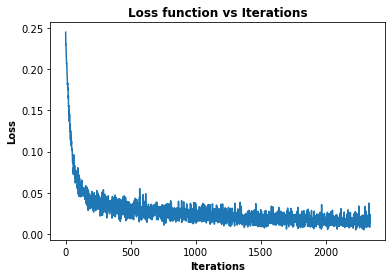

In [98]:
%matplotlib inline
plt.xlabel('Iterations',fontweight='bold') 
plt.ylabel('Loss',fontweight='bold')  
plt.title('Loss function vs Iterations',fontweight='bold')
plt.plot(x,y)
plt.show()

predicted number 1
Labeled number 1


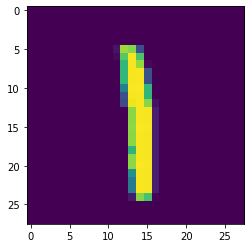

In [113]:
imgs, lbls = next(iter(test_loader))
rand=np.random.randint(0,len(imgs)-1)
img = imgs[rand].reshape(mnist_img_size)
gt_lbl = lbls[rand]
#print(img.shape)

import matplotlib.pyplot as plt

pred = jnp.argmax(MLP_predict(MLP_params, np.ravel(img)))
print('predicted number', pred)
print('Labeled number', gt_lbl)

plt.imshow(img); plt.show()

## Refrences For Task 3
1. [https://github.com/google/jax/blob/main/examples/mnist_classifier_fromscratch.py](https://github.com/google/jax/blob/main/examples/mnist_classifier_fromscratch.py)
2. [https://jax.readthedocs.io/en/latest/notebooks/Neural_Network_and_Data_Loading.html](https://jax.readthedocs.io/en/latest/notebooks/Neural_Network_and_Data_Loading.html)
3. [https://roberttlange.github.io/posts/2020/03/blog-post-10/](https://roberttlange.github.io/posts/2020/03/blog-post-10/)

# Task 4

 Creation of 1-D Liner data set

In [115]:
keys = jax.random.PRNGKey(1701)

Actual mean of the given sample :  1.8485674
Actual standard deviation of the given sample :  1.9805337 




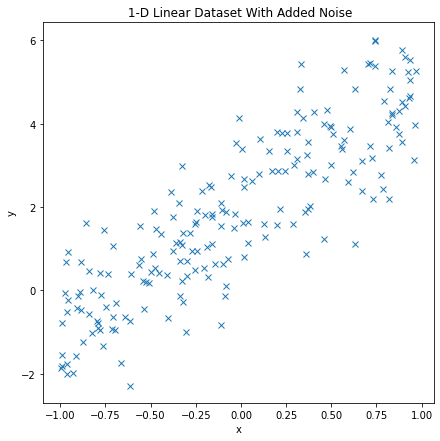

In [220]:
key, subkey = jax.random.split(keys)
Noise=200
n=Noise
rands = jax.random.uniform(key, shape=(n, ), minval=-1, maxval=1)

x = jnp.ones((n, 2))
x = x.at[:,0].set(rands)
# Fix our "true" slope and bias terms
slope, bias = (3, 2)
beta_true = jnp.array((slope, bias))
errs = random.normal(subkey, shape=(n, ))
y = (x @ beta_true) + errs
x=x[:, 0]
keys =key
print('Actual mean of the given sample : ',jnp.mean(y))
print('Actual standard deviation of the given sample : ',jnp.std(y),'\n\n')


fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title=" 1-D Linear Dataset With Added Noise")
ax.plot(x, y, "x", label="sampled data")





Use of HMC blackjax sampler

Actual mean of the given sample :  1.8485674
Actual standard deviation of the given sample :  1.9805337 


Predicted mean of the given sample :  1.9970218
Predicted Standard deviation of the given sample :  1.858673 




Text(0, 0.5, 'Standard Deviation')

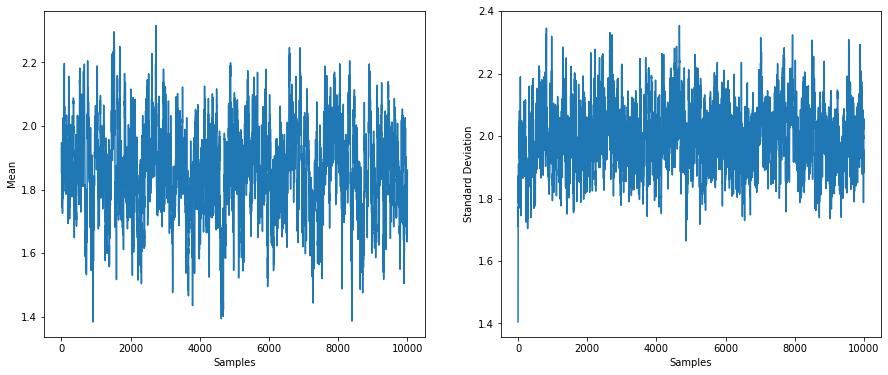

In [222]:
print('Actual mean of the given sample : ',jnp.mean(y))
print('Actual standard deviation of the given sample : ',jnp.std(y),'\n\n')

def logprob_fn(loc, scale, observed=y):
    """Univariate Normal"""
    logpdf = norm.logpdf(y, loc, scale)
    return jnp.sum(logpdf)


logprob = lambda x: logprob_fn(**x)

inv_mass_matrix = np.array([0.5, 0.5])
num_integration_steps = 60
step_size = 1e-3

hmc = blackjax.hmc(logprob, step_size, inv_mass_matrix, num_integration_steps)


initial_position = {"loc": 2.0, "scale": 1.0}
initial_state = hmc.init(initial_position)


def inference_loop(rng_key, kernel, initial_state, num_samples):
    @jax.jit
    def one_step(state, rng_key):
        state, _ = kernel(rng_key, state)
        return state, state

    keys = jax.random.split(rng_key, num_samples)
    _, states = jax.lax.scan(one_step, initial_state, keys)

    return states


hmc_kernel = jax.jit(hmc.step)
rng_key = jax.random.PRNGKey(0)
states = inference_loop(rng_key, hmc_kernel, initial_state, 10_000)

loc_samples = states.position["loc"].block_until_ready()
scale_samples = states.position["scale"]

print('Predicted mean of the given sample : ',jnp.mean(scale_samples))
print('Predicted Standard deviation of the given sample : ',jnp.mean(loc_samples),'\n\n')



fig, (ax, ax1) = plt.subplots(ncols=2, figsize=(15, 6))
ax.plot(loc_samples)
ax.set_xlabel("Samples")
ax.set_ylabel("Mean")

ax1.plot(scale_samples)
ax1.set_xlabel("Samples")
ax1.set_ylabel("Standard Deviation")

## Refrences For Task 4
1. [https://coax.readthedocs.io/en/latest/examples/linear_regression/jax.html](https://coax.readthedocs.io/en/latest/examples/linear_regression/jax.html)
2. [https://docs.pymc.io/en/v3/pymc-examples/examples/generalized_linear_models/GLM-linear.html](https://docs.pymc.io/en/v3/pymc-examples/examples/generalized_linear_models/GLM-linear.html)
2. [https://blackjax-devs.github.io/blackjax/examples/Introduction.html#hmc](https://blackjax-devs.github.io/blackjax/examples/Introduction.html#hmc)